In [22]:
import numpy as np 

import matplotlib.pyplot as plt


# This import is needed to modify the way figure behaves
from mpl_toolkits.mplot3d import Axes3D
Axes3D
%matplotlib inline 

from ipywidgets import *

import pickle_functions as PK
import plot_functions as PL
import helpers as HL

%load_ext autoreload
import pickle
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
folder="SectionE_grid"
modification="datapoints"
np.random.seed(123)

In [24]:
Xs, colors, X_2ds,datapoint=PK.get_augmented_swissroll(create=False, datapoints=True)

In [25]:
for i ,X in enumerate(Xs): 
    print('Number of datapopints in data set',i,'is',X.shape[0])

Number of datapopints in data set 0 is 100
Number of datapopints in data set 1 is 500
Number of datapopints in data set 2 is 1000
Number of datapopints in data set 3 is 5000
Number of datapopints in data set 4 is 10000


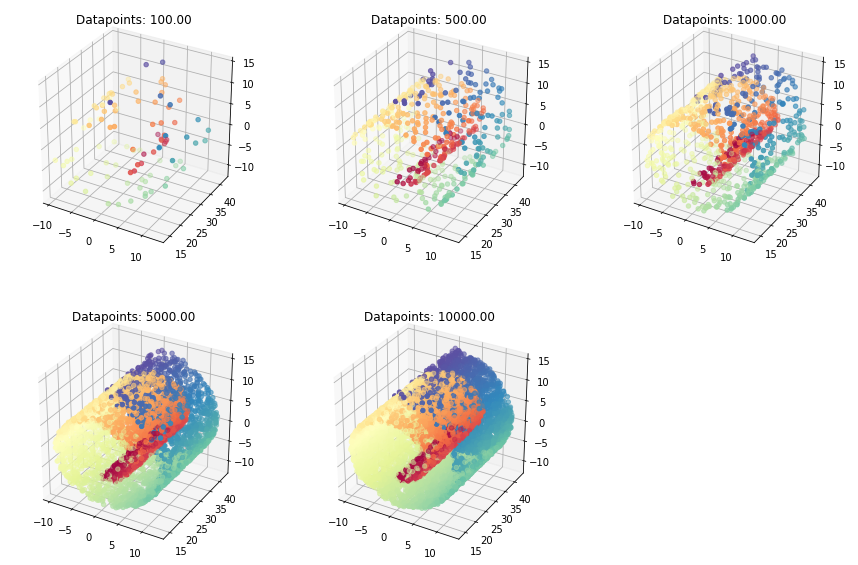

In [26]:
PL.plot_augmented_swissrolls(Xs, colors, datapoint, 'Datapoints')


# For each dataset, we want to get the LLE transformation with varying regularisation term

In [28]:
r_Ys,reg,r_times,r_reconstruction_errors,r_difference=PK.lle_different_data('r',folder, modification,N=5,create=True,Xs=Xs, X_2ds=X_2ds)

/Users/HeddaVik/AML/t-SNE-vs-LLE/pickle_functions.py:209: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X== None:
/Users/HeddaVik/AML/t-SNE-vs-LLE/pickle_functions.py:232: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_2d_lle==None:


In [ ]:
interactive(PL.plot_inter_grid, Z=fixed(r_Ys), colors=fixed(colors),var1=fixed(datapoint),var2=fixed(reg),variable=fixed('reg'), 
            transformation=fixed('LLE'),j=widgets.IntSlider(min=0,max=len(r_Ys)-1,step=1, value=0),
            i=widgets.IntSlider(min=0,max=len(reg)-1,step=1, value=0),
           error=fixed(r_reconstruction_errors),
            times=fixed(r_times),difference=fixed(r_difference)
           ,error_type=fixed('reconstruction error'),
           data_augmentation=fixed('datapoints'))

# For each dataset, we want to get the LLE transformation with varying number of neighbours. 

In [29]:
n_Ys,neighbours,n_times,n_reconstruction_errors,n_difference=PK.lle_different_data('n',folder, modification,N=5,create=True,Xs=Xs, X_2ds=X_2ds)

/Users/HeddaVik/AML/t-SNE-vs-LLE/pickle_functions.py:180: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X==None:
/Users/HeddaVik/AML/t-SNE-vs-LLE/pickle_functions.py:202: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_2d_lle==None:


In [ ]:
interactive(PL.plot_inter_grid, Z=fixed(n_Ys), colors=fixed(colors),var1=fixed(datapoint),var2=fixed(neighbours),variable=fixed('n_neighbors'), 
            transformation=fixed('LLE'),j=widgets.IntSlider(min=0,max=len(n_Ys)-1,step=1, value=0),
            i=widgets.IntSlider(min=0,max=len(neighbours)-1,step=1, value=0),
           error=fixed(n_reconstruction_errors),
            times=fixed(n_times),difference=fixed(n_difference)
           ,error_type=fixed('reconstruction error'),
           data_augmentation=fixed('holes'))

# For each dataset, we want to get the t-SNE transformation with varying perplexity. 

In [30]:
p_Zs,per,p_times,p_kl_divergences,p_difference=PK.t_sne_different_data('p',folder, modification,N=5,create=True,Xs=Xs, X_2ds=X_2ds)

/Users/HeddaVik/AML/t-SNE-vs-LLE/pickle_functions.py:77: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X==None:
/Users/HeddaVik/AML/t-SNE-vs-LLE/pickle_functions.py:95: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if X_2d_tsne==None:


first for loop is done
first for loop is done
first for loop is done
first for loop is done
first for loop is done


In [33]:
interactive(PL.plot_inter_grid, Z=fixed(p_Zs), colors=fixed(colors),var1=fixed(datapoint),var2=fixed(per),variable=fixed('per'), 
                                                                                transformation=fixed('t-SNE'),
                                                                                j=widgets.IntSlider(min=0,max=len(p_Zs)-1,step=1, value=0),
                                                                                i=widgets.IntSlider(min=0,max=len(per)-1,step=1, value=0),
                                                                                error=fixed(p_kl_divergences),
                                                                                times=fixed(p_times),difference=fixed(p_difference),
                                                                                error_type=fixed('KL-divergence'),
                                                                                data_augmentation=fixed('datapoints'))

/Users/HeddaVik/anaconda/lib/python3.6/site-packages/traitlets/traitlets.py:567: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  silent = bool(old_value == new_value)


IndexError: list index out of range

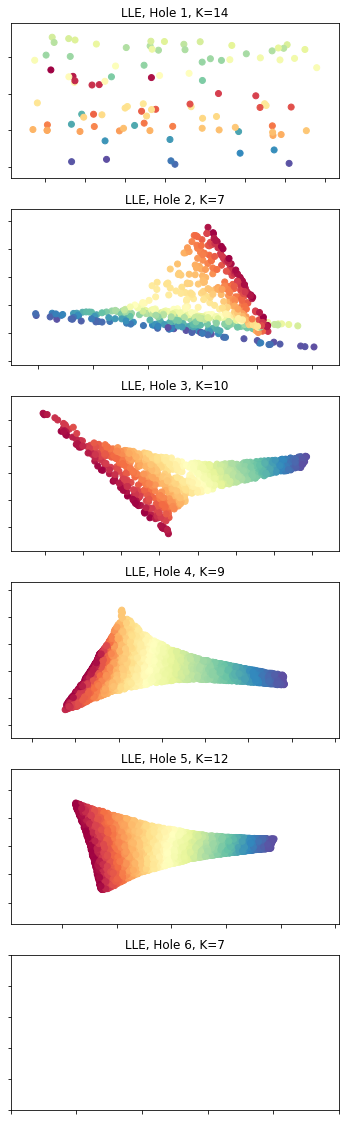

In [34]:
#Plotting a figure to compare the two methods: 

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(631)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_title('LLE, Hole 1, K=14')
ax.scatter(n_Ys[0][11][:, 0], n_Ys[0][11][:, 1], c=colors[0], cmap=plt.cm.Spectral)
ax = fig.add_subplot(634)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_title('LLE, Hole 2, K=7')
ax.scatter(n_Ys[1][4][:, 0], n_Ys[1][4][:, 1], c=colors[1], cmap=plt.cm.Spectral)
ax = fig.add_subplot(637)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_title('LLE, Hole 3, K=10')
ax.scatter(n_Ys[2][7][:, 0], n_Ys[2][7][:, 1], c=colors[2], cmap=plt.cm.Spectral)
ax = fig.add_subplot(6,3,10)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_title('LLE, Hole 4, K=9')
ax.scatter(n_Ys[3][6][:, 0], n_Ys[3][6][:, 1], c=colors[3], cmap=plt.cm.Spectral)
ax = fig.add_subplot(6,3,13)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_title('LLE, Hole 5, K=12')
ax.scatter(n_Ys[4][9][:, 0], n_Ys[4][9][:, 1], c=colors[4], cmap=plt.cm.Spectral)
ax = fig.add_subplot(6,3,16)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_title('LLE, Hole 6, K=7')
ax.scatter(n_Ys[5][4][:, 0], n_Ys[5][4][:, 1], c=colors[5], cmap=plt.cm.Spectral)




ax = fig.add_subplot(632)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_title('LLE, Hole 1, R=0.00184206996933')
ax.scatter(r_Ys[0][23][:, 0], r_Ys[0][23][:, 1], c=colors[0], cmap=plt.cm.Spectral)
ax = fig.add_subplot(635)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_title('LLE, Hole 2, R=0.00184206996933')
ax.scatter(r_Ys[1][23][:, 0], r_Ys[1][23][:, 1], c=colors[1], cmap=plt.cm.Spectral)
ax = fig.add_subplot(638)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_title('LLE, Hole 3, R=0.167683293681')
ax.scatter(r_Ys[2][27][:, 0], r_Ys[2][27][:, 1], c=colors[2], cmap=plt.cm.Spectral)
ax = fig.add_subplot(6,3,11)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_title('LLE, Hole 4, R=6.25055192527e-05')
ax.scatter(r_Ys[3][20][:, 0], r_Ys[3][20][:, 1], c=colors[3], cmap=plt.cm.Spectral)
ax = fig.add_subplot(6,3,14)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_title('LLE, Hole 5, R=0.000596362331659')
ax.scatter(r_Ys[4][22][:, 0], r_Ys[4][22][:, 1], c=colors[4], cmap=plt.cm.Spectral)
ax = fig.add_subplot(6,3,17)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_title('LLE, Hole 6, R=0.00568986602902')
ax.scatter(r_Ys[5][21][:, 0], r_Ys[5][21][:, 1], c=colors[5], cmap=plt.cm.Spectral)



ax = fig.add_subplot(633)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_title('t-SNE, Hole 1, Perp=16')
ax.scatter(p_Zs[0][7][:, 0], p_Zs[0][7][:, 1], c=colors[0], cmap=plt.cm.Spectral)
ax = fig.add_subplot(636)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_title('t-SNE, Hole 2, Perp=18')
ax.scatter(p_Zs[1][8][:, 0], p_Zs[1][8][:, 1], c=colors[1], cmap=plt.cm.Spectral)
ax = fig.add_subplot(639)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_title('t-SNE, Hole 3, Perp=22')
ax.scatter(p_Zs[2][10][:, 0], p_Zs[2][10][:, 1], c=colors[2], cmap=plt.cm.Spectral)
ax = fig.add_subplot(6,3,12)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_title('t-SNE, Hole 4, Perp=24')
ax.scatter(p_Zs[3][11][:, 0], p_Zs[3][11][:, 1], c=colors[3], cmap=plt.cm.Spectral)
ax = fig.add_subplot(6,3,15)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_title('t-SNE, Hole 5, Perp=24')
ax.scatter(p_Zs[4][11][:, 0], p_Zs[4][11][:, 1], c=colors[4], cmap=plt.cm.Spectral)
ax = fig.add_subplot(6,3,18)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_title('t-SNE, Hole 6, Perp=20')
ax.scatter(p_Zs[5][9][:, 0], p_Zs[5][9][:, 1], c=colors[5], cmap=plt.cm.Spectral)

plt.show()

In [ ]:
# Plotting a smaller figure that can be included in the report: 
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(321)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_title('Hole 1, 2D')
ax.scatter(X_2ds[0][0], X_2ds[0][1],c=colors[0], cmap=plt.cm.Spectral)
ax = fig.add_subplot(322)
ax.set_title('Hole 5, 2D')
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.scatter(X_2ds[4][0], X_2ds[4][1],c=colors[4], cmap=plt.cm.Spectral)

ax = fig.add_subplot(323)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_title('LLE, Hole 1, K=14')
ax.scatter(n_Ys[0][11][:, 0], n_Ys[0][11][:, 1], c=colors[0], cmap=plt.cm.Spectral)
ax = fig.add_subplot(325)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_title('t-SNE, Hole 1, Perp=16')
ax.scatter(p_Zs[0][7][:, 0], p_Zs[0][7][:, 1], c=colors[0], cmap=plt.cm.Spectral)
ax = fig.add_subplot(324)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_title('LLE, Hole 5, K=12')
ax.scatter(n_Ys[4][9][:, 0], n_Ys[4][9][:, 1], c=colors[4], cmap=plt.cm.Spectral)
ax = fig.add_subplot(326)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_title('t-SNE, Hole 5, Perp=24')
ax.scatter(p_Zs[4][11][:, 0], p_Zs[4][11][:, 1], c=colors[4], cmap=plt.cm.Spectral)
plt.savefig('hole_comparison.pdf')